# Tugas 6.1 : Implementasi Logistic Regression dengan SVD

Pada Tugas 6.1 diminta untuk melakukan proses pembuatan model menggunakan algoritma Logistic Regression dengan data yang berbentuk SVD (Singular Value Decomposition).

Dibuat Oleh:

*   Nama : Sabil Ahmad Hidayat
*   NIM : 220411100058
*   Kelas : PPW A

Link Code : https://colab.research.google.com/drive/1z440r1BVFFN0iuTSCtHVKee5VOqYE-o9?usp=sharing

Link Github : https://github.com/meinhere/ppw/tree/master/publish/tugas-6

## Import Library

In [1]:
# library awal untuk perhitungan dan pengolahan teks
import numpy as np
import pandas as pd

# library untuk proses modeling
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD

# library untuk evaluasi model
from sklearn.metrics import classification_report, confusion_matrix

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# load and save model
import pickle
import requests

## Preprocessing Data

### Load Data

#### Train

In [10]:
# train_df
train_tfidf_df = pd.read_csv('https://raw.githubusercontent.com/meinhere/ppw/master/publish/tugas-2/dataset/train_df_tfidf.csv', delimiter=',')

train_tfidf_df.head()

,aaion,aali,abadi,abai,abenkh,abnormal,absurd,ac,acara,access,...,yzr,za,zad,zaman,zarco,zenix,zero,zigzag,zona,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058149,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MONEY
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MONEY
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OTOMOTIF
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OTOMOTIF
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OTOMOTIF


#### Test

In [11]:
# test_df
test_df = pd.read_csv('https://raw.githubusercontent.com/meinhere/ppw/master/publish/tugas-2/dataset/test_df.csv', delimiter=',')

test_df.head()

,desc_clean_stem,label
0,kompas com unit kelola giat dana amanah daya m...,MONEY
1,jakarta kompas com balap gresini racing alex m...,OTOMOTIF
2,jakarta kompas com jaksa agung jagung ri salah...,MONEY
3,jakarta kompas com pt toyota astra motor tam l...,OTOMOTIF
4,jakarta kompas com temu indonesia africa forum...,MONEY


### Preparing Data Train

#### Convert to SVD

In [12]:
svd_train_df = train_tfidf_df.copy()
svd_train_df.drop(columns=['label'], inplace=True)

svd_train_df

,aaion,aali,abadi,abai,abenkh,abnormal,absurd,ac,acara,access,...,yusdistira,yzr,za,zad,zaman,zarco,zenix,zero,zigzag,zona
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058149,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
76,0.053854,0.0,0.0,0.0,0.0,0.0,0.0,0.037974,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
77,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
78,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.121219,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [15]:
# Menerapkan untuk LSA
n = 80 # Jumlah component/fitur yang ingin dihasilkan dari svd
svd = TruncatedSVD(n_components=n)
svd_matrix = svd.fit_transform(svd_train_df)

# Menampilkan matrix svd
print(f"Shape : {svd_matrix.shape}")
print(svd_matrix)

Shape : (80, 80)
[[ 1.54510634e-01 -9.21097057e-02  9.38904274e-03 ... -1.14938909e-03
  -1.51825296e-04 -1.02999206e-18]
 [ 1.67615266e-01 -1.60479805e-01  1.23665623e-01 ...  3.11792566e-03
   2.75914213e-04 -6.93889390e-18]
 [ 2.80561596e-01 -7.35551633e-02 -6.58748219e-02 ... -1.58720646e-04
  -1.83127832e-03  1.12757026e-17]
 ...
 [ 2.45615049e-01  3.41531512e-02  2.11698472e-01 ...  1.37748793e-03
  -9.76249092e-04  2.60208521e-18]
 [ 3.50620184e-01  4.61250396e-01  1.63725318e-01 ... -2.53879878e-03
   4.38598240e-04  1.40268656e-17]
 [ 2.02074170e-01  4.51572108e-02  2.29484661e-01 ...  3.75707600e-02
   8.40612527e-04  8.67361738e-18]]


In [16]:
# Save the SVD model
with open('svd_model.pkl', 'wb') as f:
    pickle.dump(svd, f)

### Preparing Data Test

#### Load Vectorizer

In [13]:
github_raw_url = "https://raw.githubusercontent.com/meinhere/ppw/master/publish/tugas-3/model/tfidf_vectorizer.sav"

response = requests.get(github_raw_url)
response.raise_for_status()

vectorizer = pickle.loads(response.content)
vectorizer

TfidfVectorizer()

#### Load SVD Model

In [17]:
svd = pickle.load(open('svd_model.pkl', 'rb'))
svd

TruncatedSVD(n_components=80)

#### Convert to SVD

In [18]:
test = test_df['desc_clean_stem']
test_tfidf = vectorizer.transform(test)
vocabulary = vectorizer.get_feature_names_out().tolist()

# Convert to DataFrame for easier handling
test_tfidf_df = pd.DataFrame(test_tfidf.toarray(), columns=vocabulary)
test_tfidf_df['label'] = test_df['label'].tolist()

test_tfidf_df

,aaion,aali,abadi,abai,abenkh,abnormal,absurd,ac,acara,access,...,yzr,za,zad,zaman,zarco,zenix,zero,zigzag,zona,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,MONEY
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,OTOMOTIF
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,MONEY
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,OTOMOTIF
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,MONEY
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,MONEY
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,OTOMOTIF
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,MONEY
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,MONEY
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,OTOMOTIF


In [19]:
svd_test_df = test_tfidf_df.copy()
svd_test_df.drop(columns=['label'], inplace=True)

svd_test_df

,aaion,aali,abadi,abai,abenkh,abnormal,absurd,ac,acara,access,...,yusdistira,yzr,za,zad,zaman,zarco,zenix,zero,zigzag,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [20]:
svd.transform(svd_test_df)

array([[ 0.13890281, -0.12079558,  0.01487368, ..., -0.01012647,
        -0.00392951, -0.00381805],
       [ 0.06850116, -0.02670307,  0.01521463, ..., -0.00611763,
         0.01411249,  0.01274348],
       [ 0.14083866, -0.14551061,  0.07379427, ...,  0.0020201 ,
         0.0315353 , -0.00380684],
       ...,
       [ 0.21009956, -0.18191961, -0.03705772, ..., -0.00539651,
        -0.00278399, -0.00832235],
       [ 0.28349708,  0.09571222,  0.06388888, ..., -0.06758286,
        -0.00434409, -0.00416499],
       [ 0.22535405, -0.16832362, -0.02557858, ..., -0.01824684,
         0.03409403, -0.02484877]])

### Encode Label

#### Train

In [24]:
# menggunakan label_encoder untuk merubah kata menjadi angka
label_encoder = preprocessing.LabelEncoder()

svd_train_df = pd.DataFrame(svd_matrix, columns=[f"fitur_{i}" for i in range(n)])
svd_train_df['label'] = label_encoder.fit_transform(train_tfidf_df['label'])

svd_train_df

,fitur_0,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5,fitur_6,fitur_7,fitur_8,fitur_9,...,fitur_71,fitur_72,fitur_73,fitur_74,fitur_75,fitur_76,fitur_77,fitur_78,fitur_79,label
0,0.154511,-0.092110,0.009389,-0.057277,0.023159,-0.015457,-0.085723,0.009479,0.042742,0.151400,...,0.008182,-0.029483,-0.003838,0.006198,-0.000624,-0.001649,-0.001149,-0.000152,-1.029992e-18,0
1,0.167615,-0.160480,0.123666,-0.087440,-0.021450,0.036397,-0.116556,0.003932,0.328147,-0.080676,...,0.009005,0.004962,0.001842,0.011955,0.000723,-0.003098,0.003118,0.000276,-6.938894e-18,0
2,0.280562,-0.073555,-0.065875,-0.052997,0.086978,0.158835,0.020187,-0.098443,0.021328,0.184733,...,-0.034219,0.032068,0.010054,-0.047236,-0.007279,0.000428,-0.000159,-0.001831,1.127570e-17,1
3,0.228636,-0.021336,0.018543,0.027823,-0.020240,0.121039,-0.021710,-0.057752,-0.041176,0.046354,...,-0.004470,0.011823,0.005718,-0.007954,0.004140,-0.005867,0.000041,0.000736,-6.358846e-17,1
4,0.216845,-0.247775,0.413091,0.035352,-0.232263,0.144427,-0.053011,0.110312,-0.116285,0.000692,...,0.029571,-0.046789,-0.007026,-0.005451,0.006092,-0.021225,-0.000366,0.000847,-6.125742e-18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.348659,-0.019416,-0.431868,0.182309,-0.252674,0.160199,-0.213033,0.105406,-0.064889,-0.186460,...,0.115925,0.016511,0.008167,0.016517,-0.003211,0.003145,0.002238,-0.000534,4.065758e-17,1
76,0.162660,-0.012383,-0.022736,-0.008033,0.005046,-0.014277,-0.012398,0.013250,0.031806,0.147201,...,-0.001109,0.020118,0.003685,-0.014810,0.000066,0.000631,0.001712,0.000256,8.662775e-17,1
77,0.245615,0.034153,0.211698,0.631479,0.367951,-0.225138,-0.035274,0.043684,0.040226,-0.075333,...,0.023762,0.016052,0.026303,-0.001379,-0.257027,-0.011250,0.001377,-0.000976,2.602085e-18,1
78,0.350620,0.461250,0.163725,-0.290131,0.014102,-0.289675,-0.179755,0.312955,-0.074864,-0.037487,...,0.420856,0.052031,-0.201563,0.008192,-0.003856,0.008485,-0.002539,0.000439,1.402687e-17,1


#### Test

In [25]:
svd_test_df = pd.DataFrame(svd.transform(svd_test_df), columns=[f"fitur_{i}" for i in range(n)])
svd_test_df['label'] = label_encoder.transform(test_df['label'])

svd_test_df

,fitur_0,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5,fitur_6,fitur_7,fitur_8,fitur_9,...,fitur_71,fitur_72,fitur_73,fitur_74,fitur_75,fitur_76,fitur_77,fitur_78,fitur_79,label
0,0.138903,-0.120796,0.014874,-0.047188,0.068682,-0.046017,-0.020225,-0.047264,-0.006490,0.014544,...,0.012030,0.013598,0.010907,0.018831,0.011180,-0.009576,-0.010126,-0.003930,-0.003818,0
1,0.068501,-0.026703,0.015215,0.007021,0.002277,-0.003760,0.002439,-0.009288,-0.007944,0.000531,...,-0.000678,-0.002572,0.003208,-0.018037,0.026713,-0.003458,-0.006118,0.014112,0.012743,1
2,0.140839,-0.145511,0.073794,-0.097229,0.033568,0.014285,-0.110476,-0.012968,0.388776,-0.090990,...,0.009462,-0.021879,-0.001093,-0.043368,0.001179,-0.008323,0.002020,0.031535,-0.003807,0
3,0.240121,0.009897,-0.302969,0.179268,-0.162708,0.111860,-0.179074,0.086793,-0.042947,-0.125300,...,0.089958,0.004362,0.005730,0.014823,-0.007060,0.009424,-0.002525,0.001714,0.008891,1
4,0.176573,-0.151630,-0.038109,-0.075819,0.052371,-0.061953,-0.020599,-0.062116,-0.038795,-0.026010,...,-0.004206,-0.028352,0.003585,-0.020259,-0.003235,-0.006387,-0.001796,0.030949,0.011851,0
5,0.190948,-0.146426,-0.058740,-0.081921,0.121821,0.007882,0.054739,0.074122,0.027870,0.059984,...,0.006581,-0.004582,0.002811,0.010163,-0.008788,-0.006214,0.014071,-0.107075,0.003470,0
6,0.253080,-0.045199,-0.072818,-0.008129,0.043600,0.101491,0.050720,-0.090886,0.022288,0.168519,...,-0.016157,-0.004601,0.014144,0.009836,-0.008667,0.024004,-0.011852,0.009163,0.003263,1
7,0.160402,-0.121466,-0.013509,-0.035045,0.067659,-0.045630,-0.036278,-0.017147,0.012283,0.017196,...,0.016810,0.025732,-0.008765,0.016042,0.008459,-0.006878,-0.021374,0.008854,0.000755,0
8,0.057781,-0.055509,0.031545,-0.045710,0.027827,0.008927,-0.052920,-0.010795,0.130949,-0.028965,...,-0.023689,0.017378,-0.014337,0.018912,-0.006293,-0.009305,-0.007926,0.006163,-0.001319,0
9,0.095287,-0.054342,0.071672,0.052127,0.042525,0.001520,-0.043533,0.005327,0.051439,0.001987,...,0.017279,0.000942,0.012163,0.003978,-0.075792,-0.038897,0.000935,0.003210,0.002725,1


## Logistic Regression

### Splitting Data

In [26]:
# Separate features (X) and target (y) for training data
X_train = svd_train_df.drop('label', axis=1)
y_train = svd_train_df['label']

# Separate features (X) and target (y) for testing data
X_test = svd_test_df.drop('label', axis=1)
y_test = svd_test_df['label']

### Training

In [27]:
# fit model untuk training
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

### Testing

In [28]:
# mencoba prediksi dari hasi fitting model
y_pred = lr_model.predict(X_test)

y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

### Evaluation

In [29]:
# melihat nilai actual dan predicted
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.head()


,Actual value,Predicted value
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



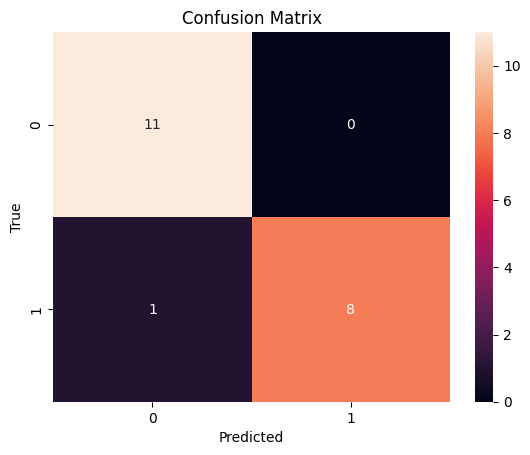

In [30]:
# Confusion matrix dan classification report
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

## Saving Model

In [31]:
# Save the pipeline to a file
filename = 'lr_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))